In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
ds=pd.read_csv("titanic.csv")
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
dt=ds.drop("Cabin",axis=1)
dt=dt.drop("Name",axis=1)
dt=dt.drop("Ticket",axis=1)

In [25]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


<Axes: ylabel='Age'>

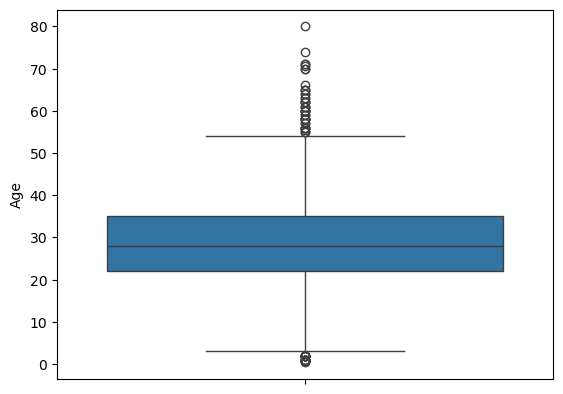

In [26]:
sns.boxplot(dt["Age"])

In [27]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'median')
dt[["Age"]] = imp.fit_transform(dt[["Age"]])
imp=imp = SimpleImputer(strategy = 'most_frequent')
dt[["Embarked"]]=imp.fit_transform(dt[["Embarked"]])

In [28]:
dt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in dt.columns:
  if dt[i].dtypes=="object":
    dt[i]=ds[[i]].apply(le.fit_transform)

In [31]:
dt

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [33]:
x=dt[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
y=dt[["Survived"]]

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.20,random_state=10)

In [38]:
from sklearn.linear_model import LogisticRegression
le=LogisticRegression()
le.fit(x_train,y_train)

C:\Users\ravip\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ravip\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pret=le.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pret,y_test)

0.788218793828892

In [42]:
import pickle
with open("model.pkl","wb")as f:
    pickle.dump(le,f)